# QUES 2. MEDICAL INSURANCE COST PREDICTION.

In [2]:
import pandas as pd
import numpy as np
import statsmodels
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pickle

In [49]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")   #importing dataset 
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [50]:
df.columns                    #getting the columns present in the dataset

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [51]:
df.describe()      #describing the dataset

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [52]:
df.head()                     #reading the starting elements of the dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [53]:
df.tail()             #reading the last elements of the dataset

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [55]:
df.shape          #getting the shape of dataset

(1338, 7)

In [56]:
df.isnull().sum()        #checking if any null values present in the dataset

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [57]:
df.dtypes                 #checking the types of objects present in the dataset

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

<AxesSubplot:xlabel='charges', ylabel='Density'>

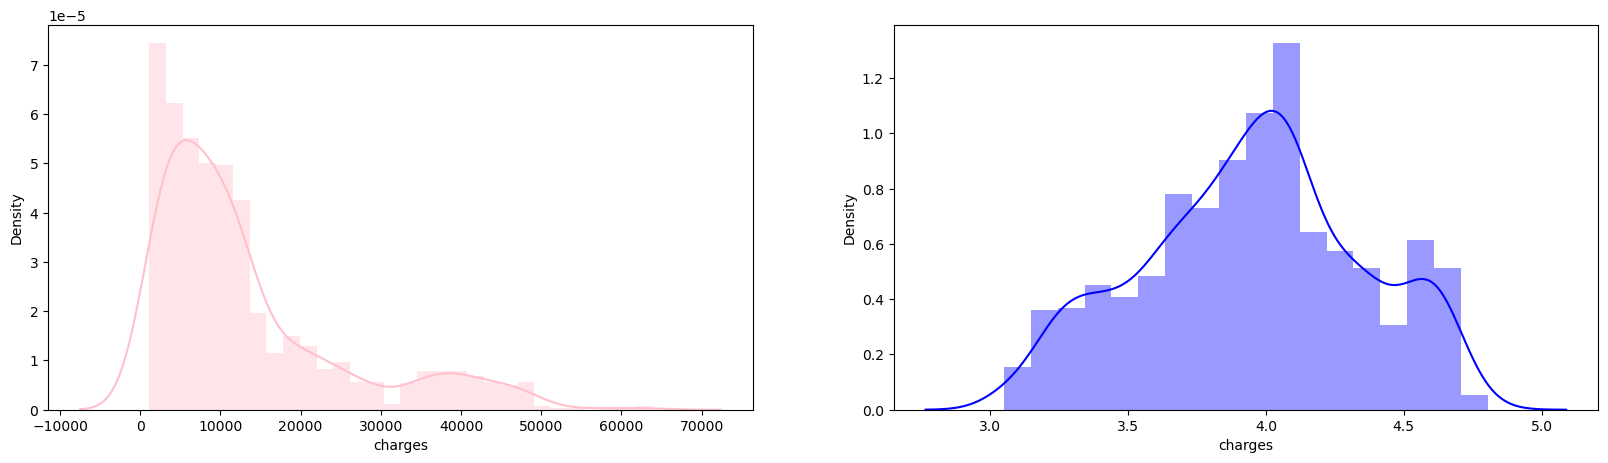

In [58]:
plt.figure(figsize=(20,5))                #distribution of charges
plt.subplot(1,2,1)
sns.distplot(df.charges,color='pink')

plt.subplot(1,2,2)
sns.distplot(np.log10(df.charges), color='blue')        #applying natural log for approx normal distribution

Text(0.5, 1.0, 'Distribution of BMI')

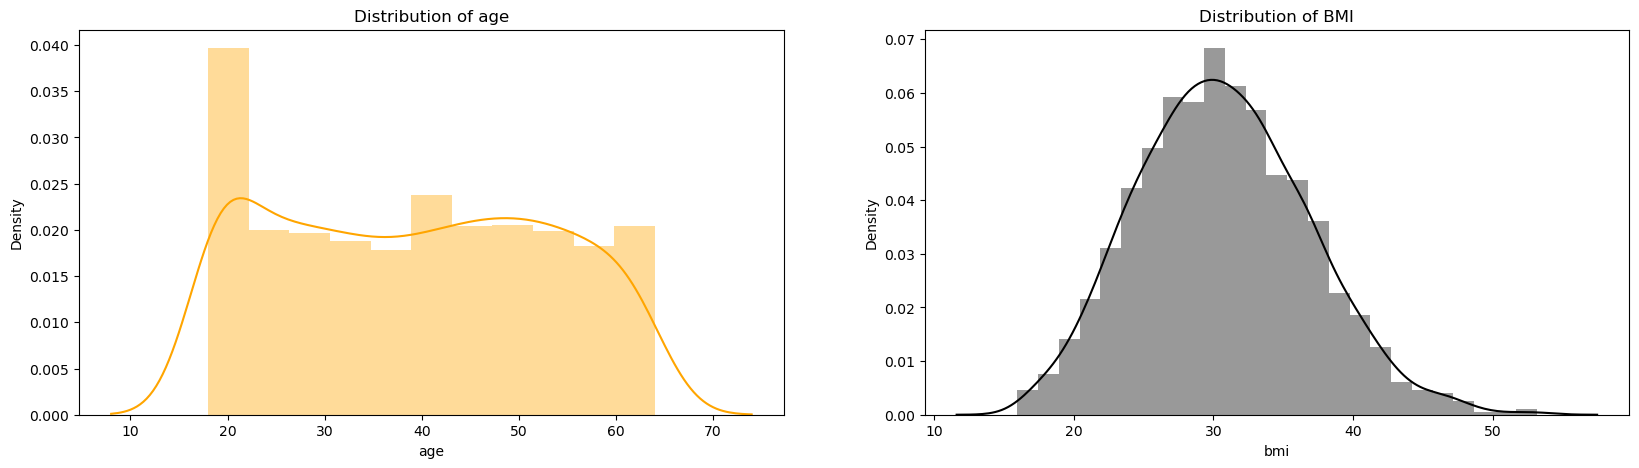

In [48]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(df.age, color='orange').set_title('Distribution of age')
plt.subplot(1,2,2)
sns.distplot(df.bmi, color='black').set_title('Distribution of BMI')

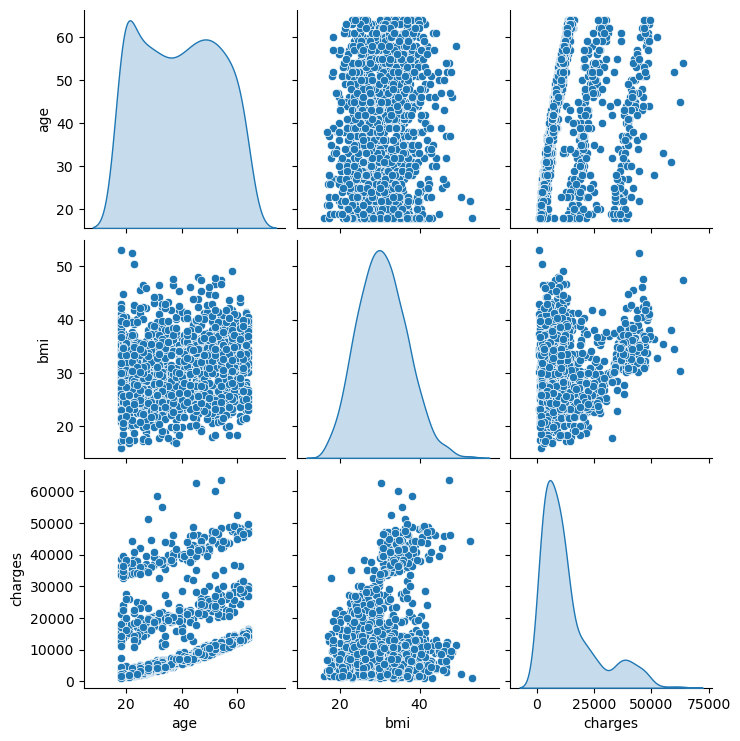

In [59]:
#Pairplot for representation of Age, BMI and Charges
df_num = df[['age','bmi','charges']]
sns.pairplot(df_num, diag_kind = 'kde')
plt.show()

Visualizing categorical variables individually vs medical charges

<AxesSubplot:xlabel='smoker', ylabel='charges'>

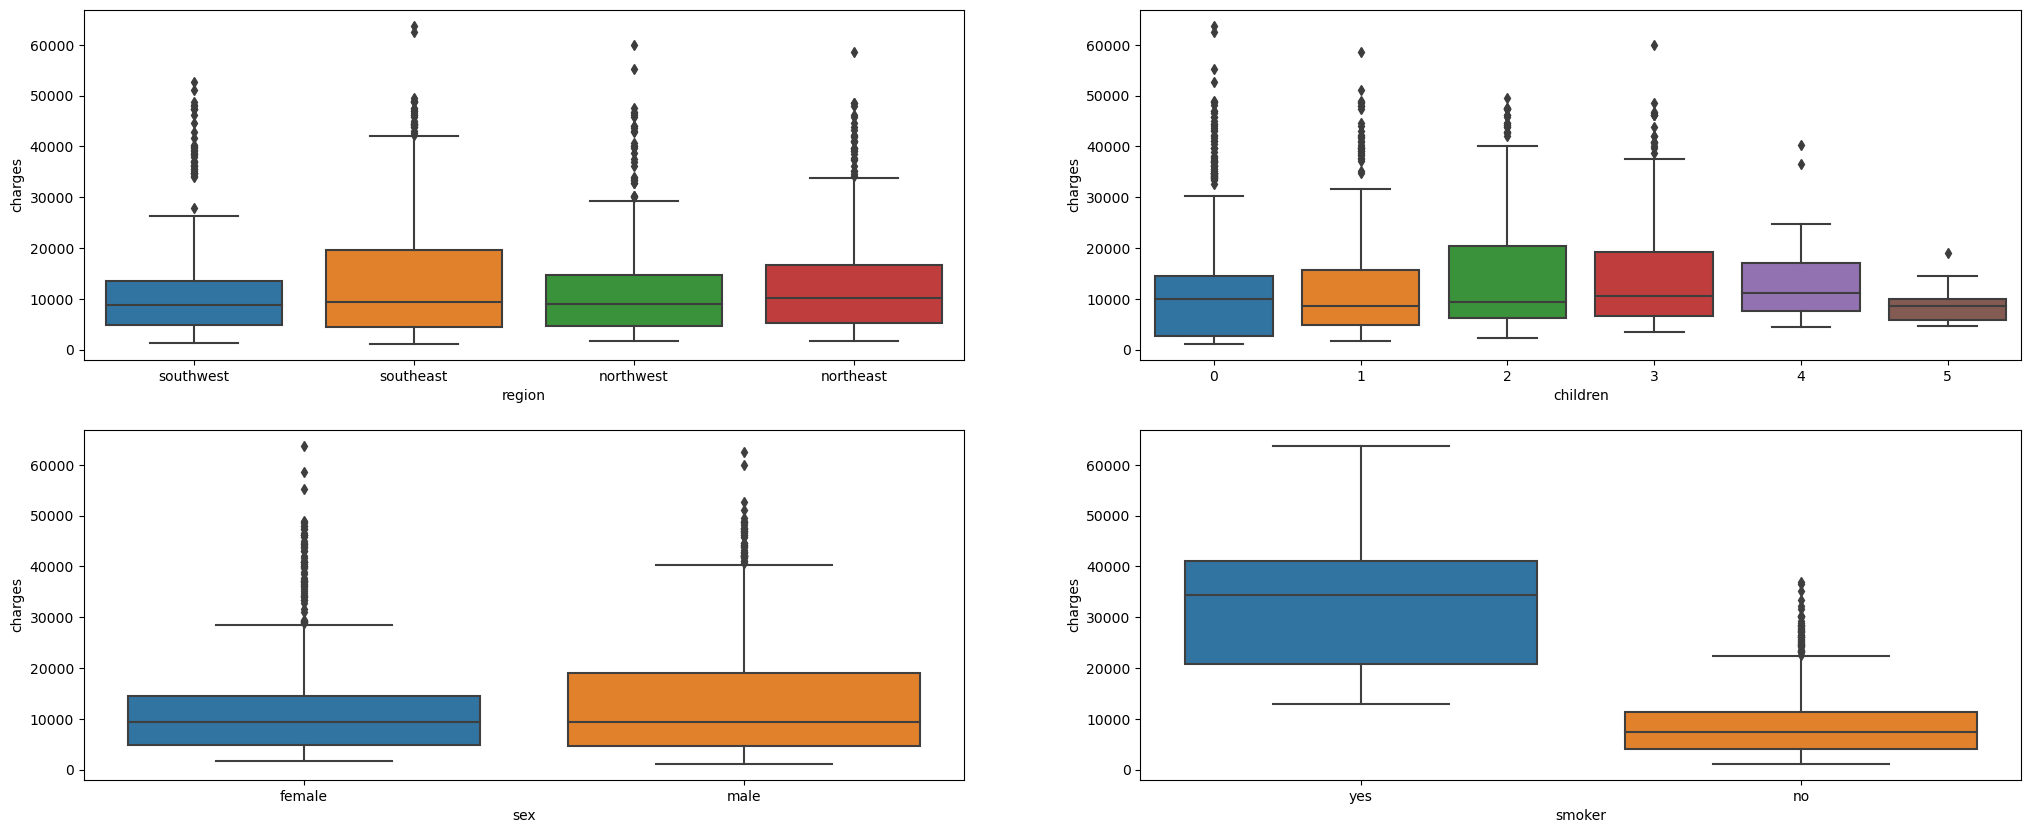

In [15]:
plt.figure (figsize=(25,10))
plt.subplot(2,2,1)
sns.boxplot(x='region', y='charges', data=df)

plt.subplot(2,2,2)
sns.boxplot(x='children', y='charges', data=df)

plt.subplot(2,2,3)
sns.boxplot(x='sex', y='charges', data=df)

plt.subplot(2,2,4)
sns.boxplot(x='smoker', y='charges', data=df)

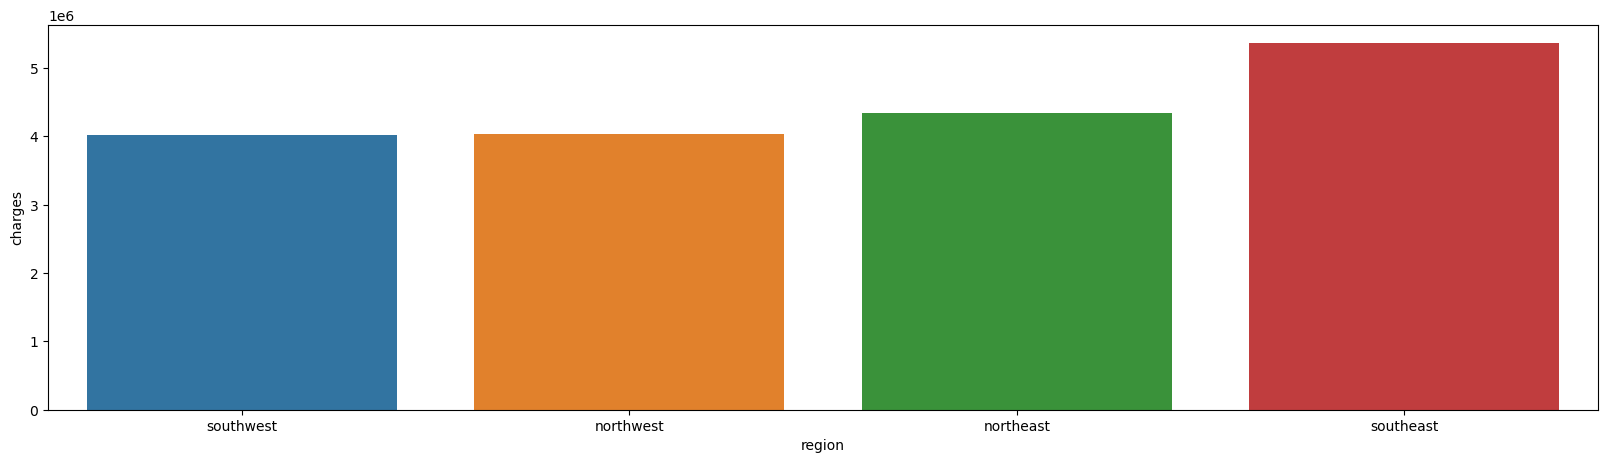

In [60]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending=True)     #Charges by region
plt.figure(figsize=(20,5))
ax=sns.barplot(x=charges.index, y=charges)

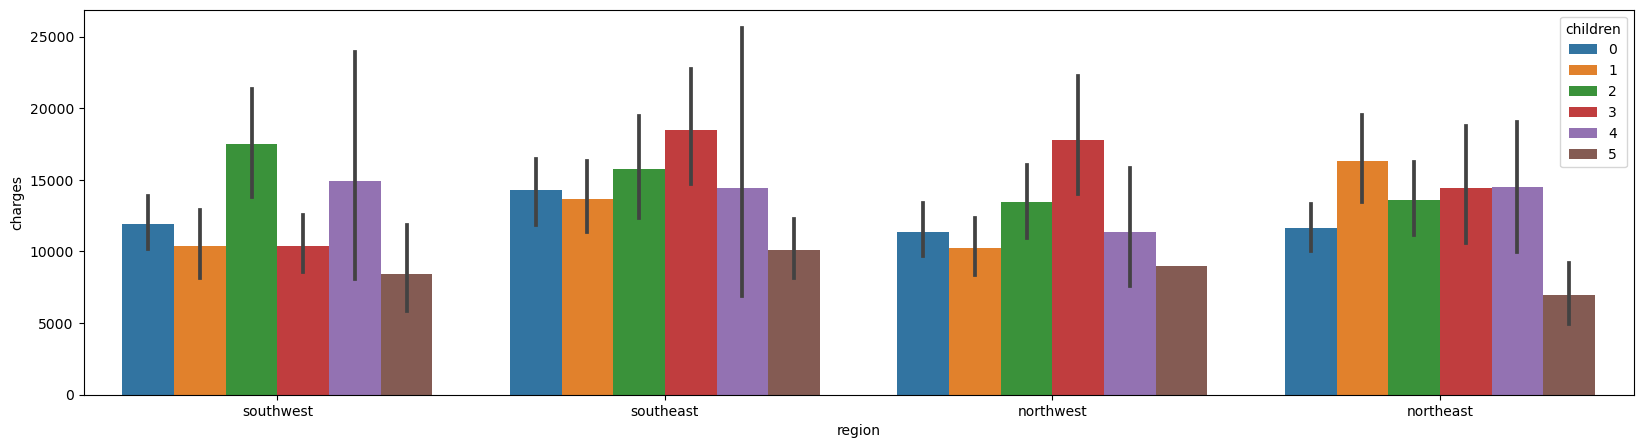

In [61]:
plt.figure(figsize=(20,5))           #Charges by region and number of children
ax=sns.barplot(x='region', y='charges', hue='children', data=df)

<AxesSubplot:xlabel='region', ylabel='charges'>

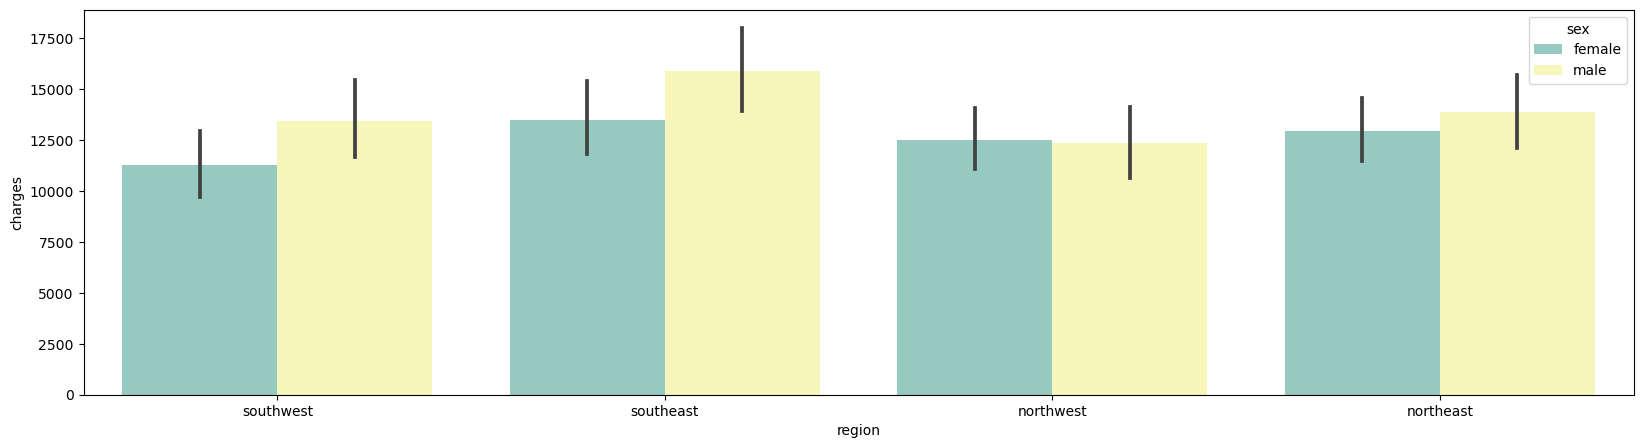

In [62]:
plt.figure(figsize=(20,5))                   #Charges by region and gender
sns.barplot(x='region', y='charges', hue='sex', data=df, palette='Set3')

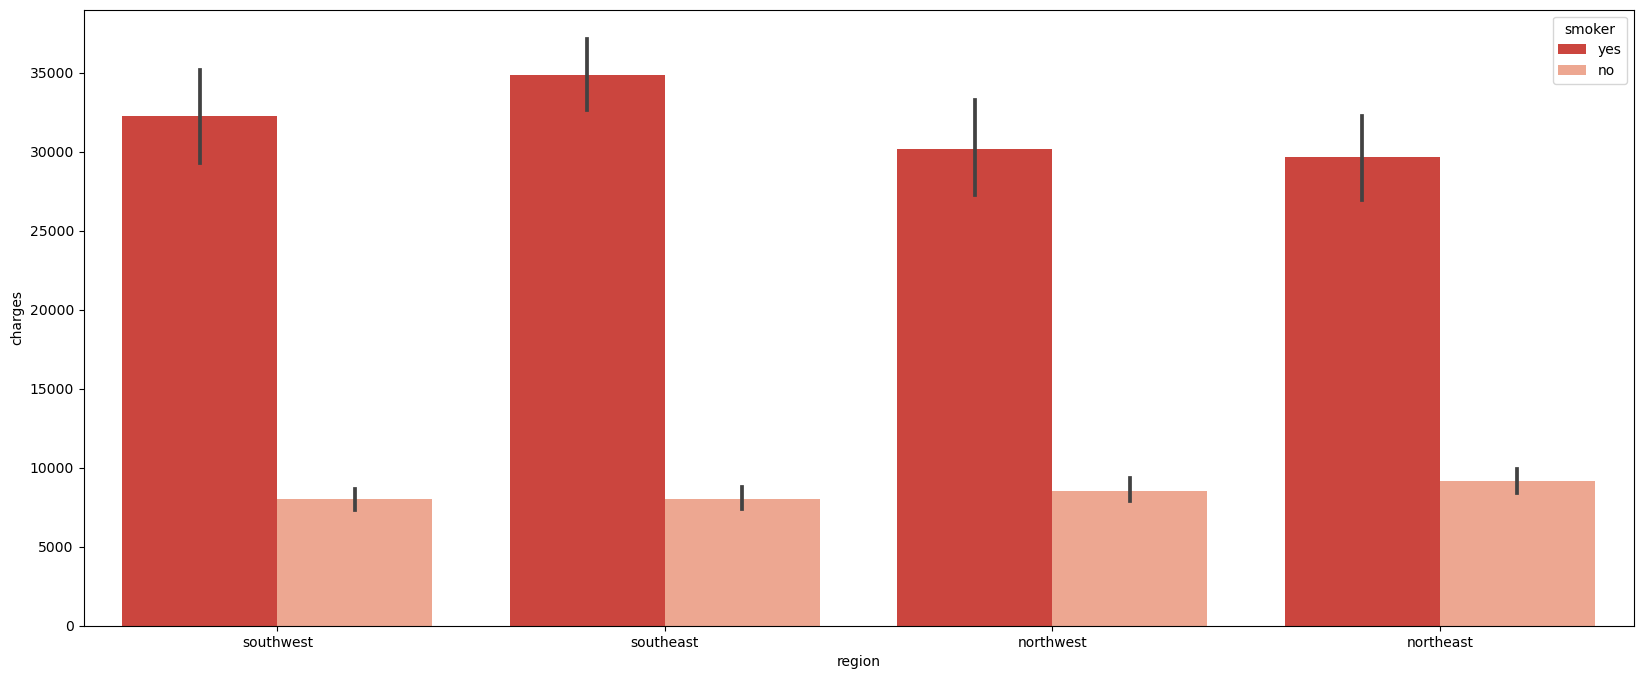

In [63]:
f, ax=plt.subplots(1, 1, figsize=(20, 8))                  #Charges by region and smokers
ax=sns.barplot(x='region', y='charges', hue='smoker', data=df, palette='Reds_r')

Text(0.5, 1.0, 'Number of children vs Medical Charges')

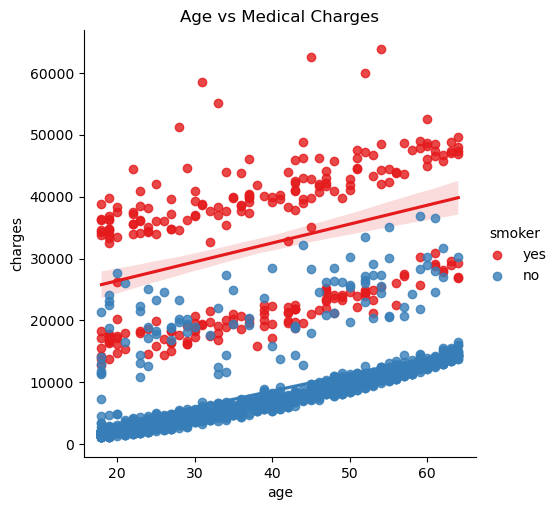

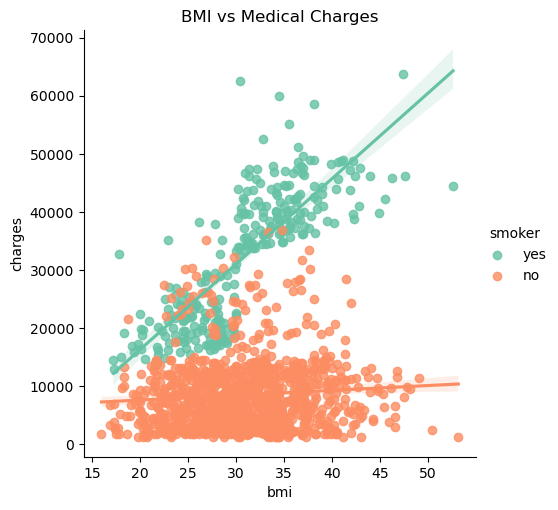

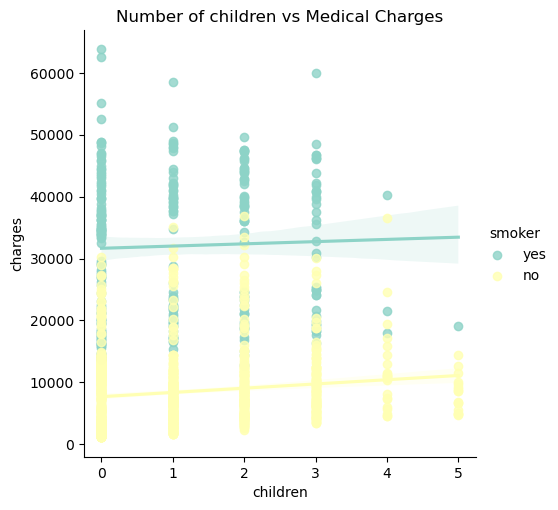

In [64]:
#Charges by age, bmi, and children based on smoking behavior
ax=sns.lmplot(x='age', y='charges', data=df, hue='smoker', palette='Set1')
plt.title('Age vs Medical Charges')

ax=sns.lmplot(x='bmi', y='charges', data=df, hue='smoker', palette='Set2')
plt.title('BMI vs Medical Charges')

ax=sns.lmplot(x='children', y='charges', data=df, hue='smoker', palette='Set3')
plt.title('Number of children vs Medical Charges')

In [65]:
#Converting data to categorical type data
df[['region','sex','smoker']]=df[['region','sex','smoker']].astype('category') 
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [66]:
#Converting Data to numerical type using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

label.fit(df.region.drop_duplicates())
df.region=label.transform(df.region)

label.fit(df.sex.drop_duplicates())
df.sex=label.transform(df.sex)

label.fit(df.smoker.drop_duplicates())
df.smoker=label.transform(df.smoker)
df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

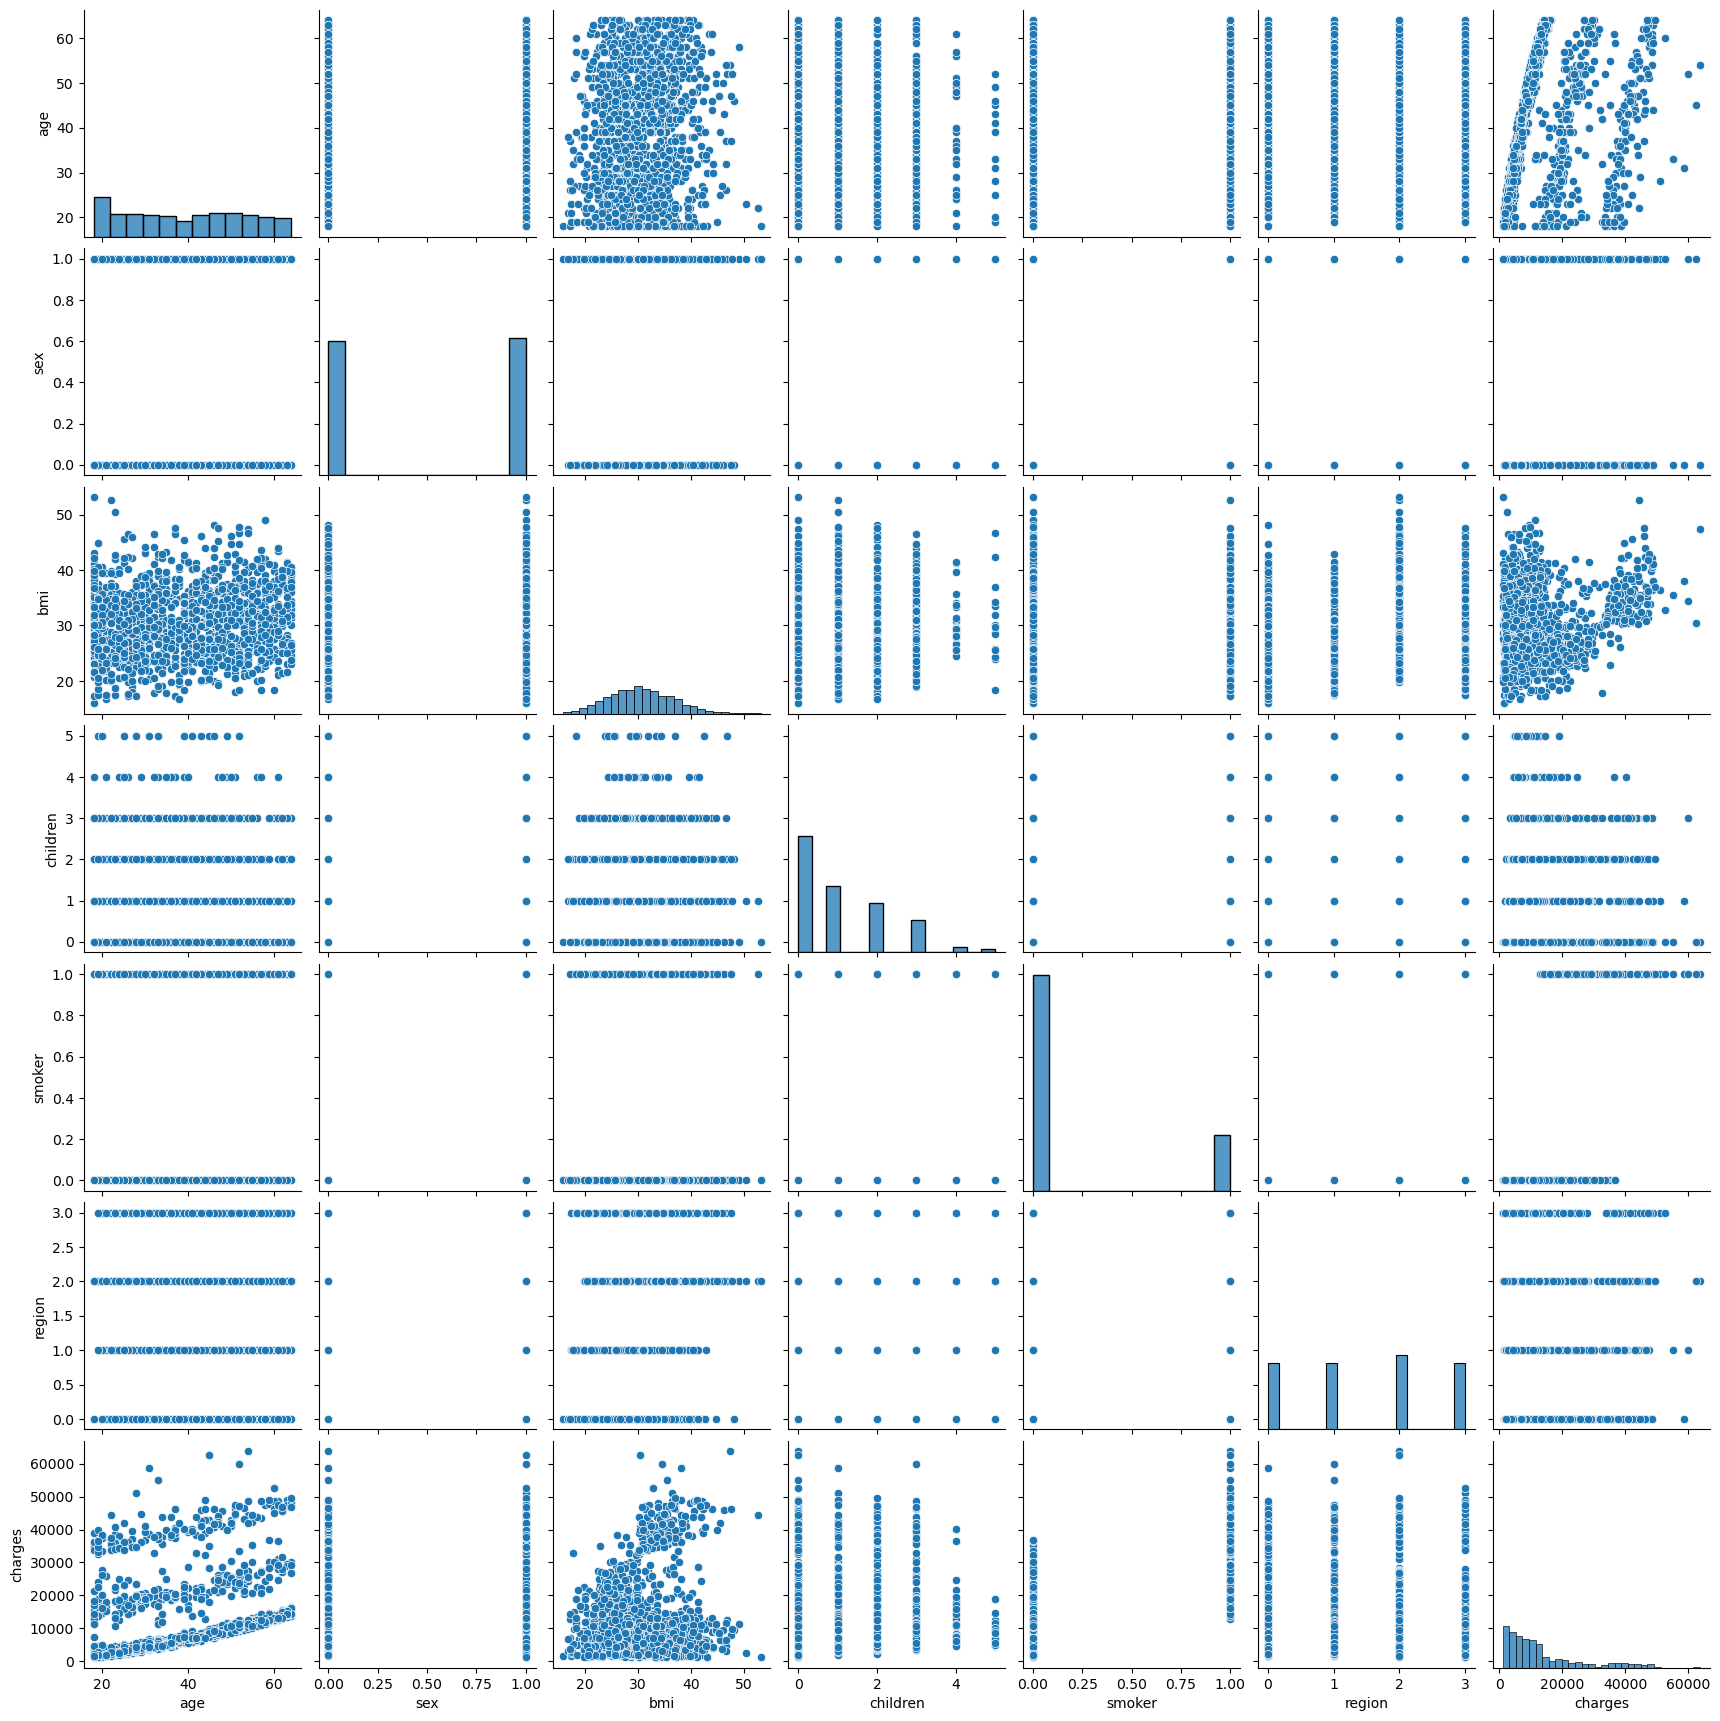

In [67]:
sns.pairplot(df)

Text(0.5, 1.0, 'Correlation Factors Heat Map')

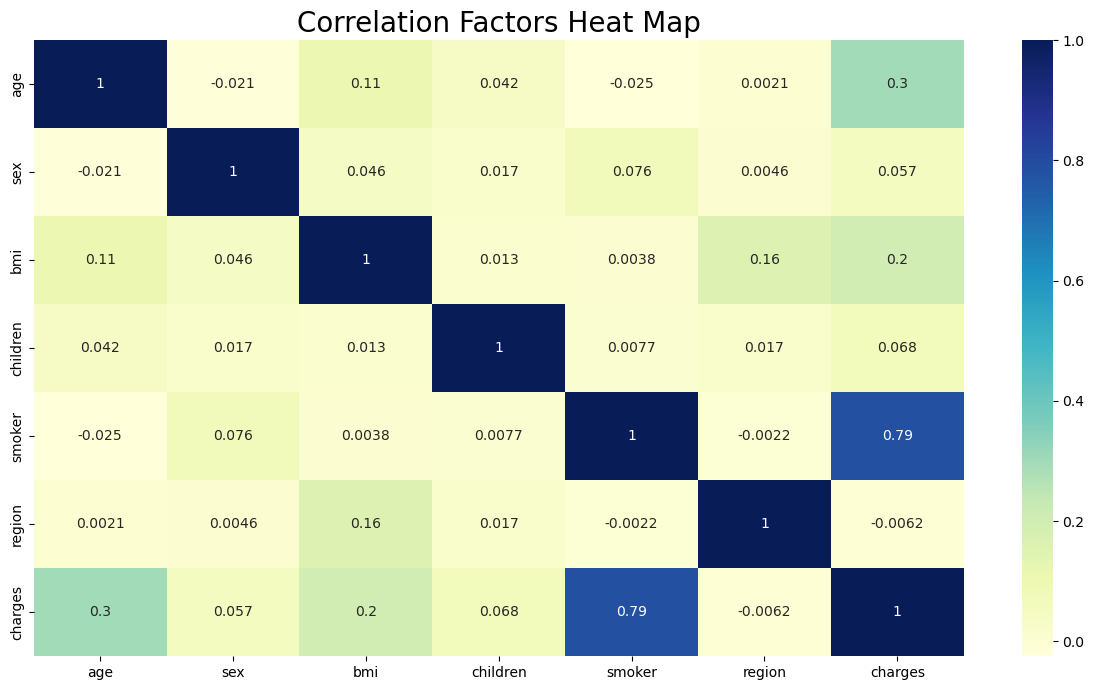

In [68]:
plt.figure(figsize=(15,8))                 #Plotting Heat Map
sns.heatmap(df.corr(), annot=True,cmap='YlGnBu').set_title('Correlation Factors Heat Map', size='20')

# Preparing data for machine learning

In [69]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [70]:
features=df.drop(['charges'], axis=1)
targets=df['charges']

In [71]:
#Splitting data into training and testing data

In [72]:
x_train, x_test, y_train, y_test=holdout(features, targets, test_size=0.2, random_state=0)

# 1. LINEAR REGRESSION

In [73]:
Lin_reg_model=LinearRegression()
Lin_reg_model.fit(x_train, y_train)
print('Intercept:', Lin_reg_model.intercept_)
print('Coefficients:', Lin_reg_model.coef_)

Intercept: -11661.983908824424
Coefficients: [  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]


In [74]:
from sklearn.metrics import r2_score, mean_squared_error

Lin_reg_model_train_pred=Lin_reg_model.predict(x_train)
Lin_reg_model_test_pred=Lin_reg_model.predict(x_test)

Lin_reg_model_train_mse=mean_squared_error(y_train, Lin_reg_model_train_pred)        # Mean squared error
Lin_reg_model_test_mse=mean_squared_error(y_test, Lin_reg_model_test_pred)
print('MSE train data: {:.3}, \nMSE test data: {:.3}\n'.format(Lin_reg_model_train_mse, Lin_reg_model_test_mse))

print('RMSE train data: {:.3}, \nRMSE test data: {:.3}\n'.format(
    np.sqrt(np.absolute(Lin_reg_model_train_mse)), 
    np.sqrt(np.absolute(Lin_reg_model_train_mse))))     #Root mean squared error

print('R2 train data: {:.3}, \nR2 test data: {:.3}\n'.format(
    r2_score(y_train,Lin_reg_model_train_pred),
    r2_score(y_test,Lin_reg_model_test_pred)))    # R^2-coefficient of determination

print('Model Score:', Lin_reg_model.score(x_test, y_test))

MSE train data: 3.77e+07, 
MSE test data: 3.18e+07

RMSE train data: 6.14e+03, 
RMSE test data: 6.14e+03

R2 train data: 0.737, 
R2 test data: 0.8

Model Score: 0.799874714544996


# RANDOM FOREST REGRESSION

In [75]:
from sklearn.ensemble import RandomForestRegressor as rfr

RFR=rfr(n_estimators=100, criterion='mse', random_state=0, n_jobs=-1)
RFR.fit(x_train, y_train)

x_train_predic=RFR.predict(x_train)
x_test_predic=RFR.predict(x_test)

train_mse=metrics.mean_squared_error(x_train_predic, y_train)                # Mean square error
test_mse=metrics.mean_squared_error(x_test_predic, y_test)
print('Mean Squared Error train data: %.3f\nMean Squared Error test data: %.3f\n' % (train_mse, test_mse))

print('RMSE train data: {:.3}, \nRMSE test data: {:.3}\n'.format(
    np.sqrt(np.absolute(train_mse)), 
    np.sqrt(np.absolute(train_mse))))                # Root mean square error

print('R2 train data: %.3f\nR2 test data: %.3f\n' % (metrics.r2_score(x_train_predic, y_train),    
                                                     metrics.r2_score(x_test_predic, y_test)))# R^2-coefficient of determination

print('Model Accuracy Score:', (RFR.score(x_test, y_test))*100)

Mean Squared Error train data: 3778409.061
Mean Squared Error test data: 20561948.169

RMSE train data: 1.94e+03, 
RMSE test data: 1.94e+03

R2 train data: 0.971
R2 test data: 0.861

Model Accuracy Score: 87.0785187973657


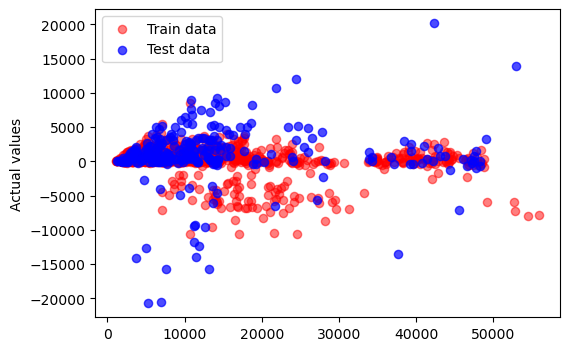

In [78]:
plt.figure(figsize=(6, 4))                   #Plotting actual vs predicted values from random forest regressor

plt.scatter(x_train_predic, x_train_predic - y_train, c='red',marker='o',s=35, alpha=0.5, label='Train data')   # Train data
plt.scatter(x_test_predic, x_test_predic - y_test,c='blue',marker='o',s=35,alpha=0.7,label='Test data')    # Test data

plt.ylabel('Actual values')
plt.legend(loc='upper left')

1.smoker(0.606920)
2.bmi(0.215579)
3.age(0.136042)
4.children(0.021231)
5.region(0.014214)
6.sex(0.006014)


<BarContainer object of 6 artists>

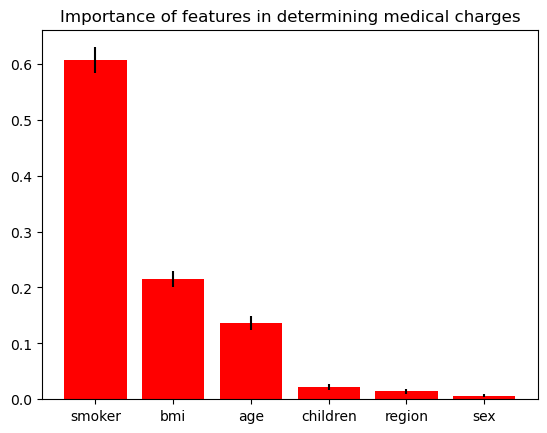

In [79]:
importances=RFR.feature_importances_                     #Feature wise importance ranking
std=np.std([tree.feature_importances_ for tree in RFR.estimators_], axis=0)

indices=np.argsort(importances)[::-1]
variables=['age', 'sex','bmi', 'children','smoker','region']

imp_list=[]
for value in range(features.shape[1]):
    variable=variables[indices[value]]
    imp_list.append(variable)
    print('%d.%s(%f)' %(value+1, variable, importances[indices[value]]))
plt.figure()                                                     # Plotting the feature importances
plt.title('Importance of features in determining medical charges')
plt.bar(imp_list, importances[indices],color='Red', yerr=std[indices], align='center')

# 3. POLYNOMIAL REGRESSION

In [80]:
from sklearn.preprocessing import PolynomialFeatures
features=df.drop(['charges','sex','region'], axis=1)
target=df.charges

pol=PolynomialFeatures(degree=2)
x_pol=pol.fit_transform(features)
x_train, x_test, y_train, y_test=holdout(x_pol, target, test_size=0.2, random_state=0)

In [81]:
Pol_reg=LinearRegression()
Pol_reg.fit(x_train, y_train)

y_train_predic=Pol_reg.predict(x_train)
y_test_predic=Pol_reg.predict(x_test)

print('Intercept:', Pol_reg.intercept_)
print('Coefficients:', Pol_reg.coef_)
print('\nModel Accuracy Score:', (Pol_reg.score(x_test, y_test))*100)

Intercept: -5325.881705253369
Coefficients: [ 0.00000000e+00 -4.01606591e+01  5.23702019e+02  8.52025026e+02
 -9.52698471e+03  3.04430186e+00  1.84508369e+00  6.01720286e+00
  4.20849790e+00 -9.38983382e+00  3.81612289e+00  1.40840670e+03
 -1.45982790e+02 -4.46151855e+02 -9.52698471e+03]

Model Accuracy Score: 88.12595703345227


The best accuracy score is given by POLYNOMIAL REGRESSION MODEL.
Hence using polynomial regression model for predicting the price.

In [82]:
features.head()

,age,bmi,children,smoker
0,19,27.900,0,1
1,18,33.770,1,0
2,28,33.000,3,0
3,33,22.705,0,0
4,32,28.880,0,0


In [83]:
targets.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [84]:
y_test_predic=Pol_reg.predict(x_test)           #Predicting the medical charges

# Creating a dataframe for comparing the Actual Values with the Predicted Values
final_values=pd.DataFrame({'Actual values': y_test, 'Predicted values': y_test_predic})
final_values

,Actual values,Predicted values
578,9724.53000,12101.156323
610,8547.69130,10440.782266
569,45702.02235,48541.022951
1034,12950.07120,14140.067522
198,9644.25250,8636.235727
...,...,...
1084,15019.76005,16712.196281
726,6664.68595,8654.565461
1132,20709.02034,12372.050609
725,40932.42950,41465.617268
